In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.svm import SVC
import datetime
import pickle

In [2]:
data = pd.read_csv("smoke_detection_iot.csv")
data.sample(5)

Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
13489       13489  1654746820          19.876        52.74       1164   
44093       44093  1654780442          26.950        47.86       1195   
37411       37411  1654773760          24.400        53.25       1074   
26250       26250  1654762599          16.980        49.86          1   
40236       40236  1654776585          26.060        52.79       1013   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
13489        529   12840        19438        938.855   2.18   2.27  15.02   
44093        400   12922        19432        938.722   1.71   1.77  11.74   
37411        567   12824        19458        938.978   2.26   2.35  15.59   
26250        400   13081        19965        939.714   0.49   0.51   3.37   
40236        406   12892        19479        938.817   1.95   2.03  13.42   

       NC1.0  NC2.5    CNT  Fire Alarm  
13489  2.343  0.053  13489           1  
44093  1.831  0.041  19099           1  
37411  2.430  0.055  12417           1  
26250  0.525  0.012   1256           0  
40236  2.092  0.047  15242           1

In [3]:
data.shape

(62630, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
data.describe()

Unnamed: 0           UTC  Temperature[C]   Humidity[%]     TVOC[ppb]  \
count  62630.000000  6.263000e+04    62630.000000  62630.000000  62630.000000   
mean   31314.500000  1.654792e+09       15.970424     48.539499   1942.057528   
std    18079.868017  1.100025e+05       14.359576      8.865367   7811.589055   
min        0.000000  1.654712e+09      -22.010000     10.740000      0.000000   
25%    15657.250000  1.654743e+09       10.994250     47.530000    130.000000   
50%    31314.500000  1.654762e+09       20.130000     50.150000    981.000000   
75%    46971.750000  1.654778e+09       25.409500     53.240000   1189.000000   
max    62629.000000  1.655130e+09       59.930000     75.200000  60000.000000   

          eCO2[ppm]        Raw H2   Raw Ethanol  Pressure[hPa]         PM1.0  \
count  62630.000000  62630.000000  62630.000000   62630.000000  62630.000000   
mean     670.021044  12942.453936  19754.257912     938.627649    100.594309   
std     1905.885439    272.464305    609.513156       1.331344    922.524245   
min      400.000000  10668.000000  15317.000000     930.852000      0.000000   
25%      400.000000  12830.000000  19435.000000     938.700000      1.280000   
50%      400.000000  12924.000000  19501.000000     938.816000      1.810000   
75%      438.000000  13109.000000  20078.000000     939.418000      2.090000   
max    60000.000000  13803.000000  21410.000000     939.861000  14333.690000   

              PM2.5         NC0.5         NC1.0         NC2.5           CNT  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean     184.467770    491.463608    203.586487     80.049042  10511.386157   
std     1976.305615   4265.661251   2214.738556   1083.383189   7597.870997   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.340000      8.820000      1.384000      0.033000   3625.250000   
50%        1.880000     12.450000      1.943000      0.044000   9336.000000   
75%        2.180000     14.420000      2.249000      0.051000  17164.750000   
max    45432.260000  61482.030000  51914.680000  30026.438000  24993.000000   

         Fire Alarm  
count  62630.000000  
mean       0.714626  
std        0.451596  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

In [6]:
data.isnull().any()

Unnamed: 0        False
UTC               False
Temperature[C]    False
Humidity[%]       False
TVOC[ppb]         False
eCO2[ppm]         False
Raw H2            False
Raw Ethanol       False
Pressure[hPa]     False
PM1.0             False
PM2.5             False
NC0.5             False
NC1.0             False
NC2.5             False
CNT               False
Fire Alarm        False
dtype: bool

In [7]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [8]:
data.drop(columns=['Unnamed: 0','CNT'],inplace=True)
def extract_time(x:int):
    time = datetime.datetime.fromtimestamp(x)
    time = time.time()
    return time.hour*3600 + time.minute*60 + time.second + time.microsecond*1e-6
data['UTC'] = data['UTC'].apply(extract_time)
data.sample(5)

UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  \
12499  32830.0          19.966        47.30       1140        573   12825   
15050  35381.0          13.038        53.02       1101        443   12867   
49618  72967.0          26.880        47.94       1285        408   13000   
45132  68481.0          24.950        51.91       1149        400   12953   
27933  51282.0          18.400        51.99        161        400   13155   

       Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  \
12499        19445        938.970   1.90   1.97  13.08  2.040  0.046   
15050        19441        938.806   2.06   2.14  14.18  2.211  0.050   
49618        19410        938.816   2.34   2.43  16.09  2.509  0.057   
45132        19432        938.729   1.61   1.67  11.09  1.729  0.039   
27933        20022        939.646   0.81   0.84   5.58  0.869  0.020   

       Fire Alarm  
12499           1  
15050           1  
49618           1  
45132           1  
27933           0

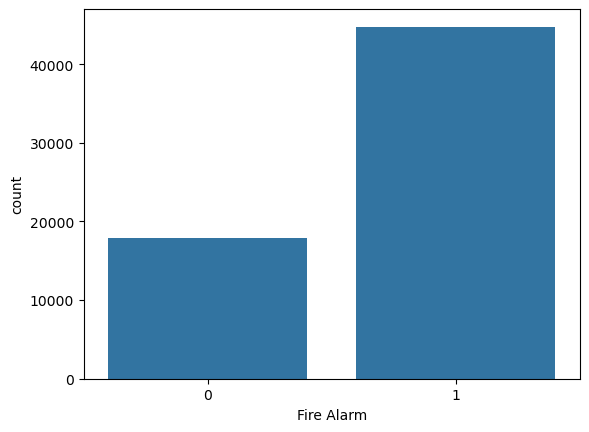

In [9]:
sns.countplot(data=data,x='Fire Alarm')
plt.show()

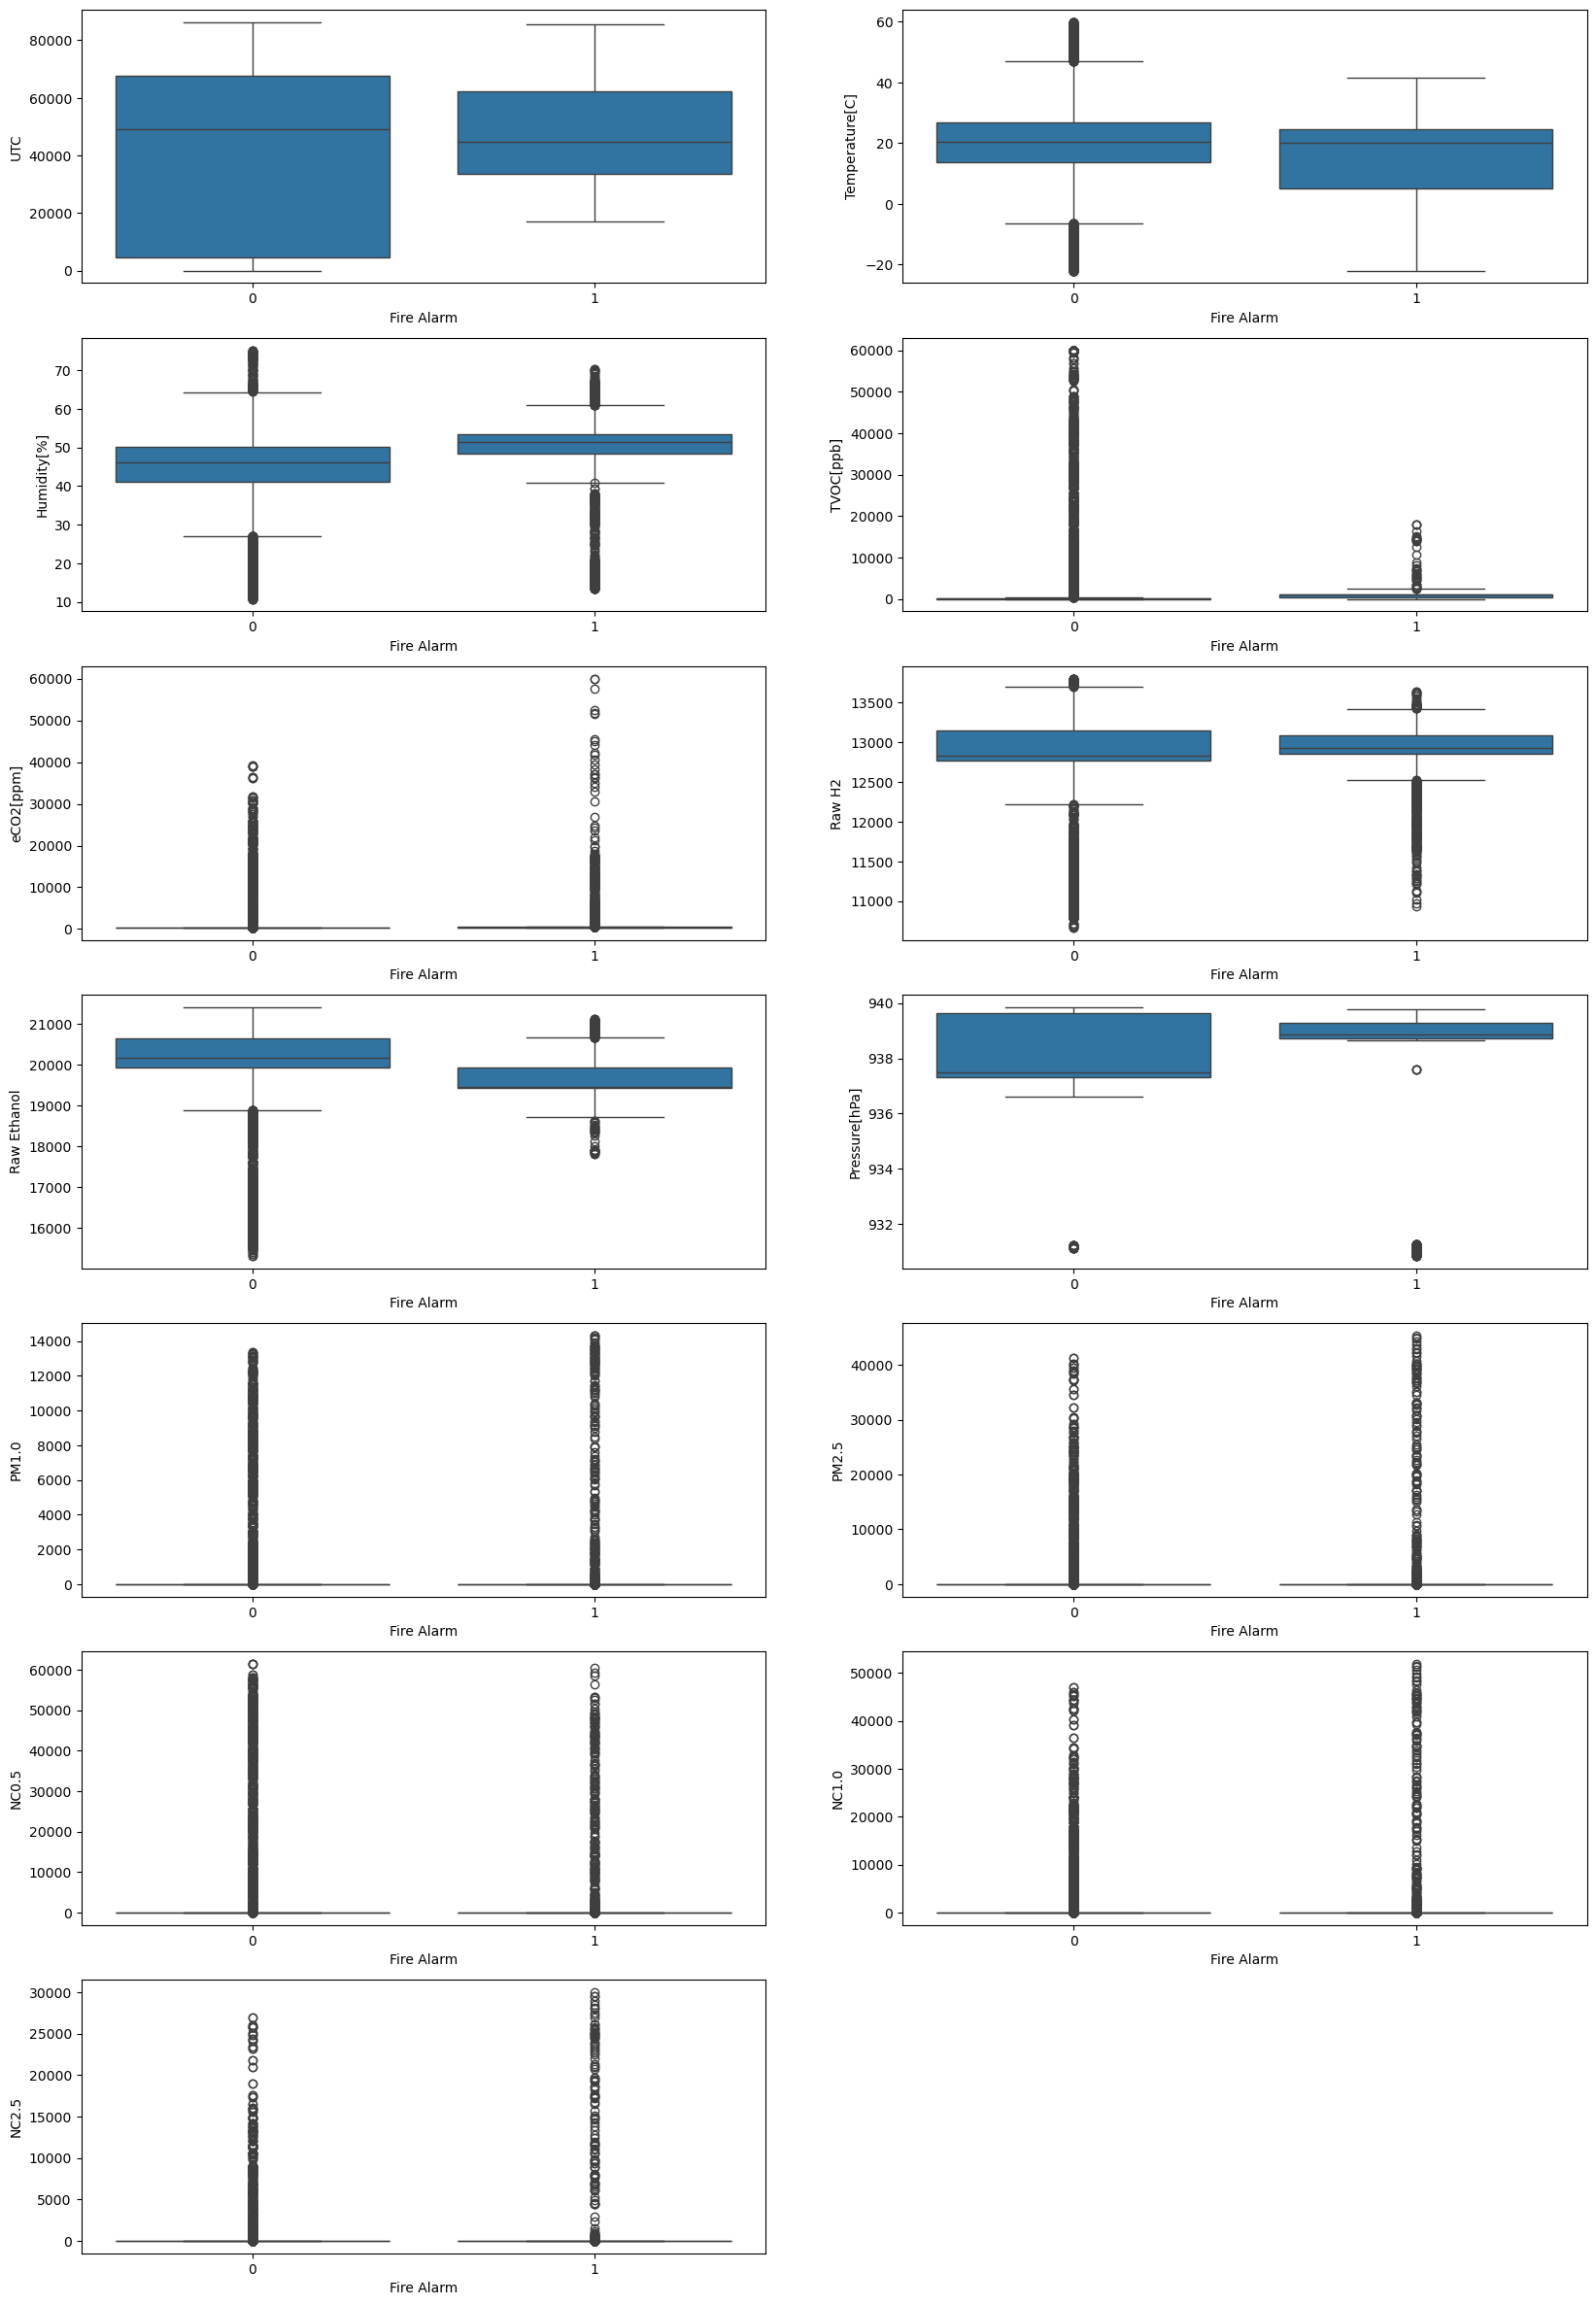

In [10]:
rows = (data.columns.shape[0]-1)//2 + (data.columns.shape[0]-1)%2
cols = 2
plt.figure(figsize=(20,30))
for i,j in enumerate(data.columns.drop('Fire Alarm')):
    plt.subplot(rows,cols,i+1)
    sns.boxplot(y=data[j],x = data['Fire Alarm'])

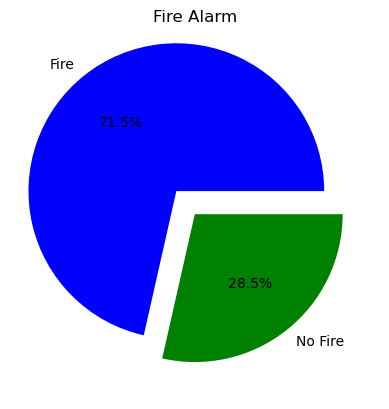

In [11]:
plt.pie(data['Fire Alarm'].value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['blue','green'])
plt.title('Fire Alarm')
plt.show()

<Axes: xlabel='NC1.0', ylabel='NC2.5'>

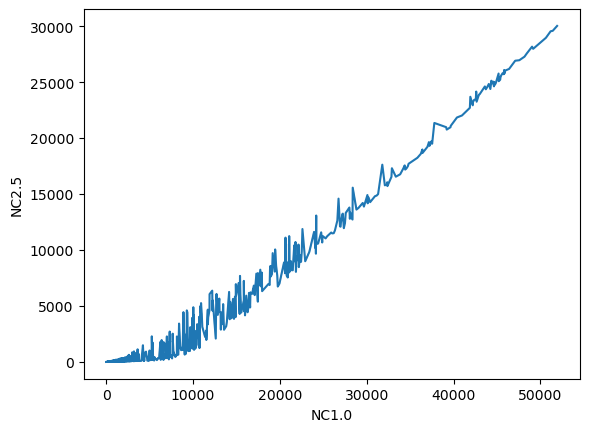

In [12]:
sns.lineplot(x='NC1.0',y='NC2.5',data=data)

<Axes: >

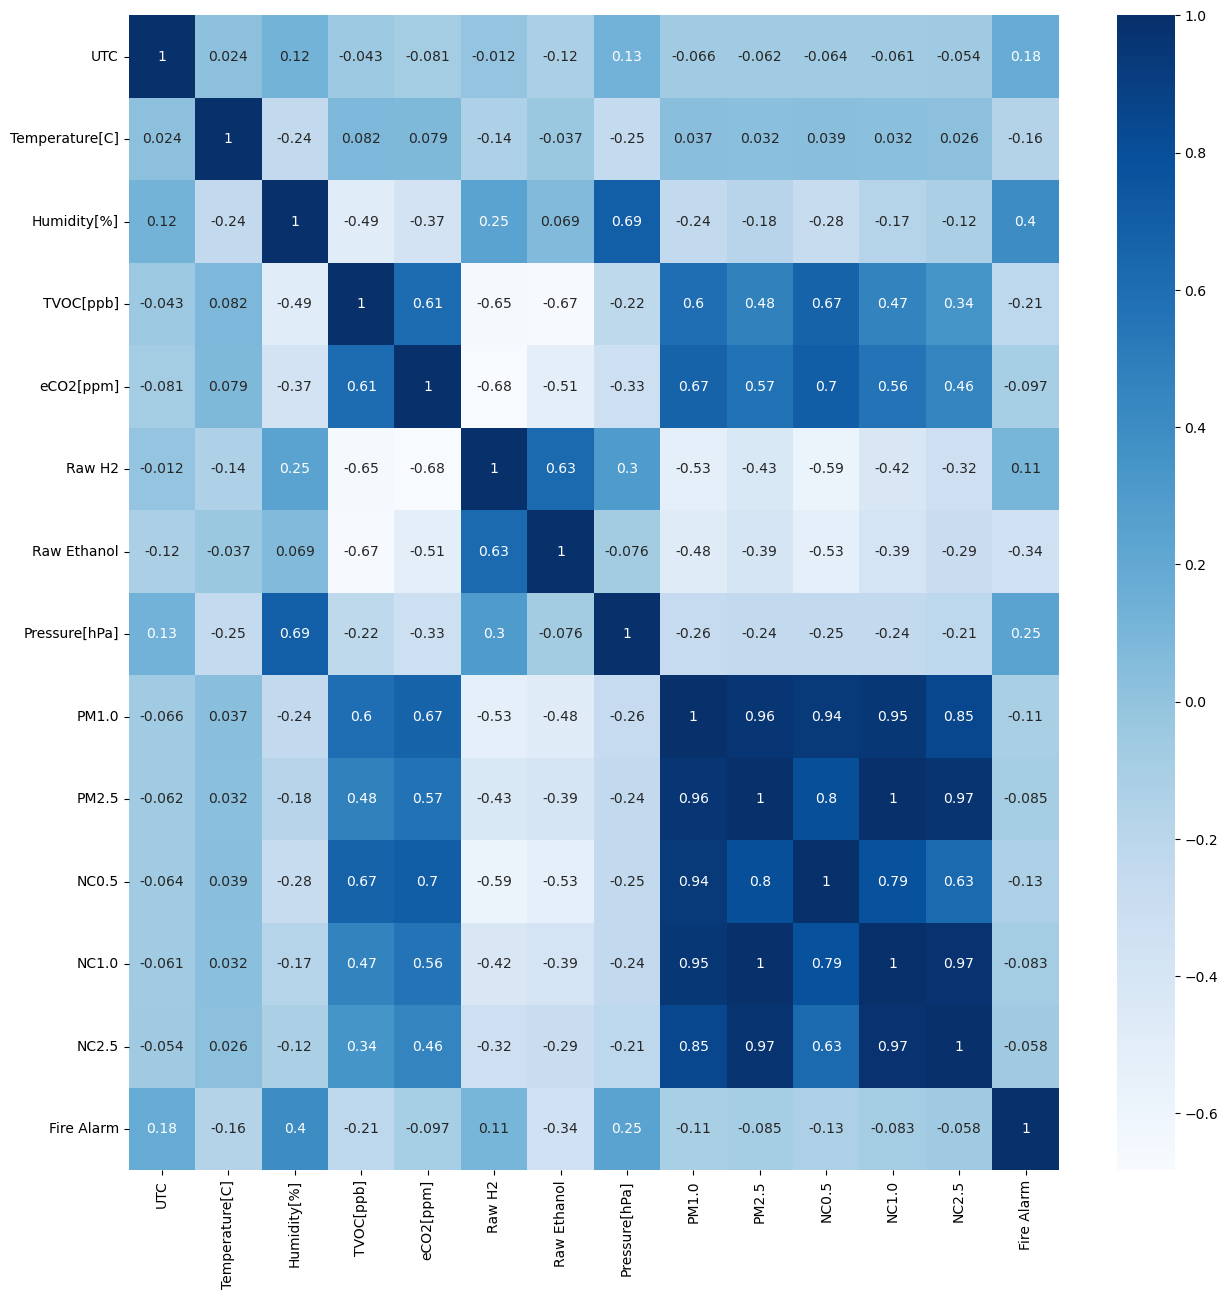

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

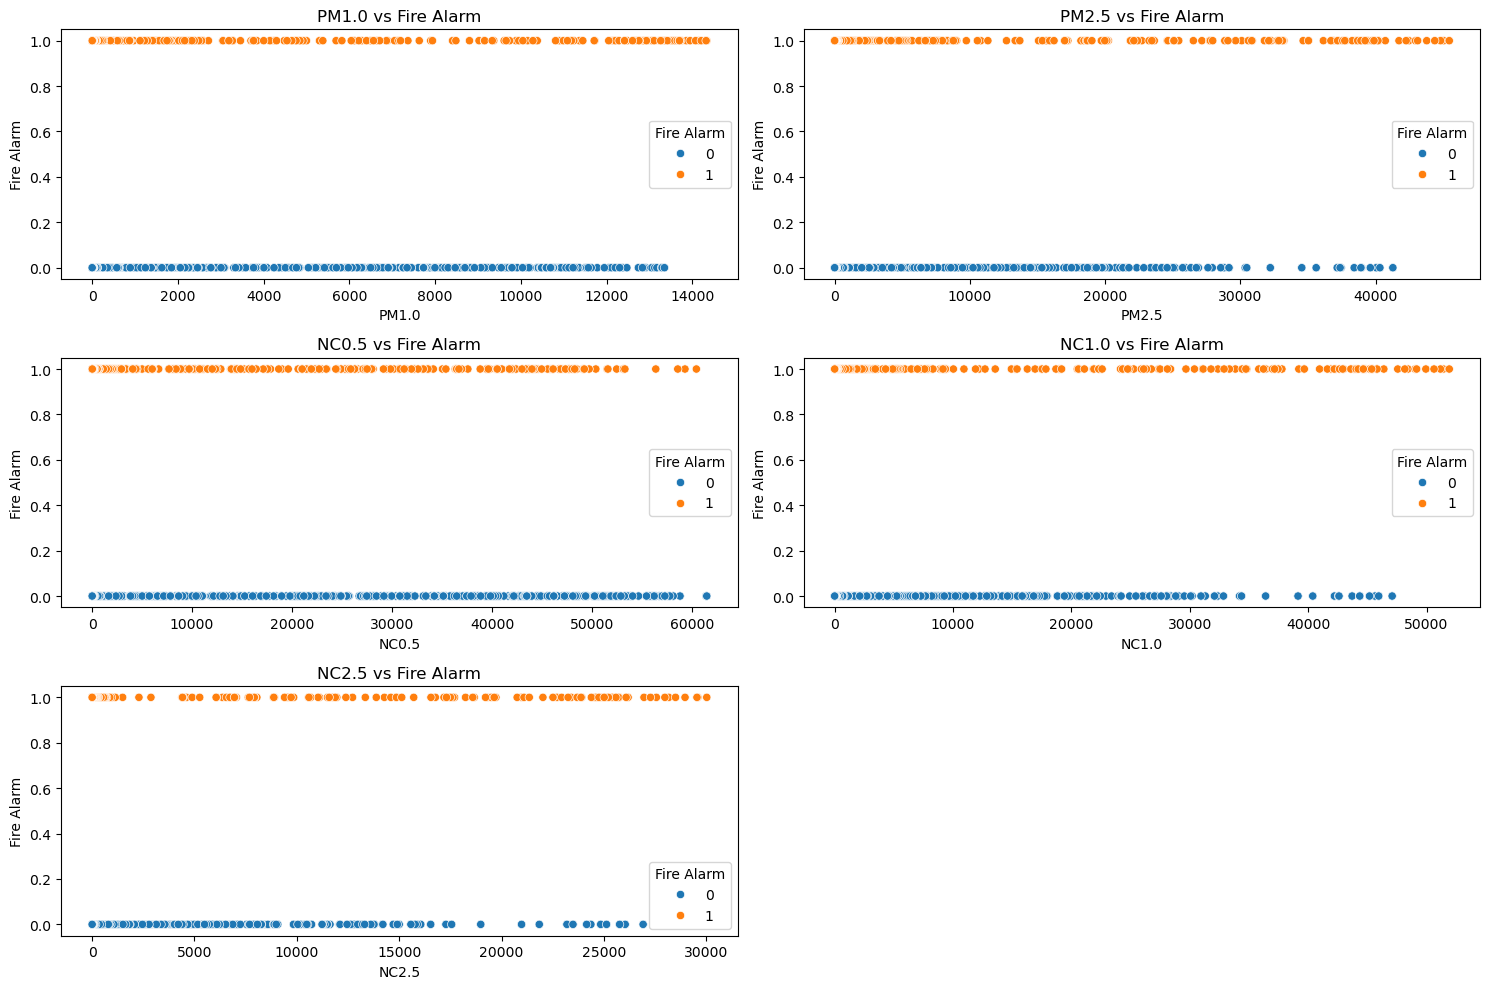

In [14]:
selected_vars = ['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']

plt.figure(figsize=(15, 10))

for i, var in enumerate(selected_vars, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(x=var, y='Fire Alarm', data=data,hue="Fire Alarm")
    plt.title(f'{var} vs Fire Alarm')

plt.tight_layout()

plt.show()

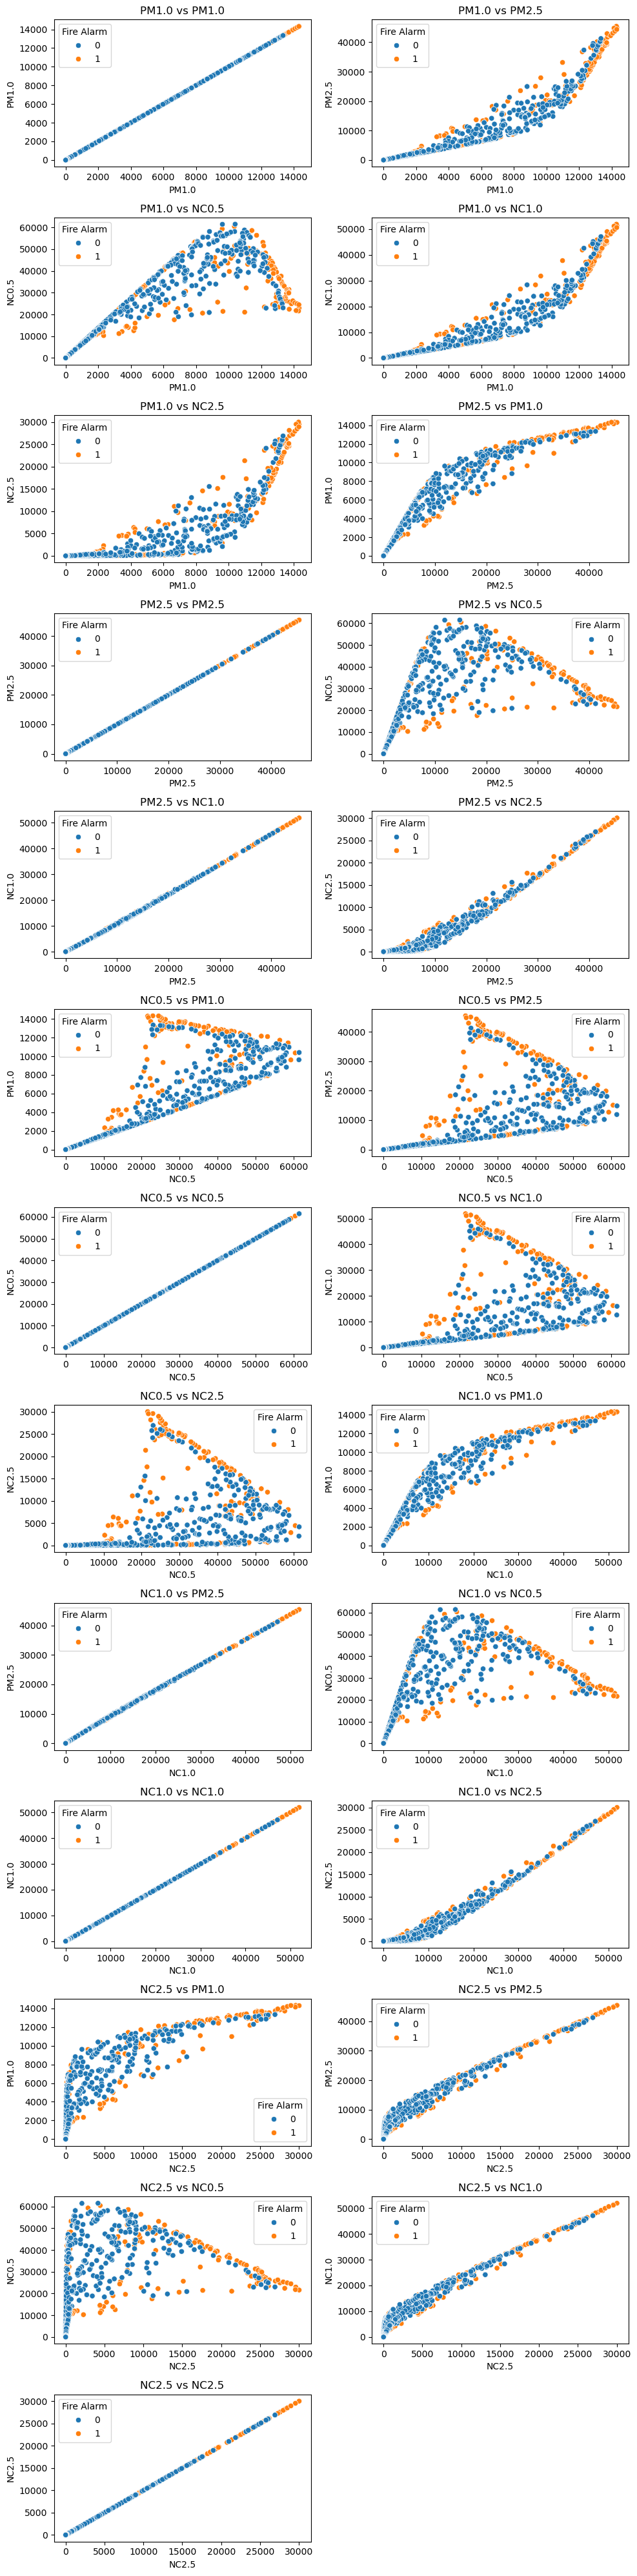

In [15]:
selected_vars = ['PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']

plt.figure(figsize=(10,40))

v = 1  # Counter for subplot index

for i in selected_vars:
    for j in selected_vars:
        plt.subplot(13, 2, v)
        sns.scatterplot(x=i, y=j, data=data,hue='Fire Alarm')
        plt.title(f'{i} vs {j}')
        v += 1
plt.tight_layout()
plt.show()

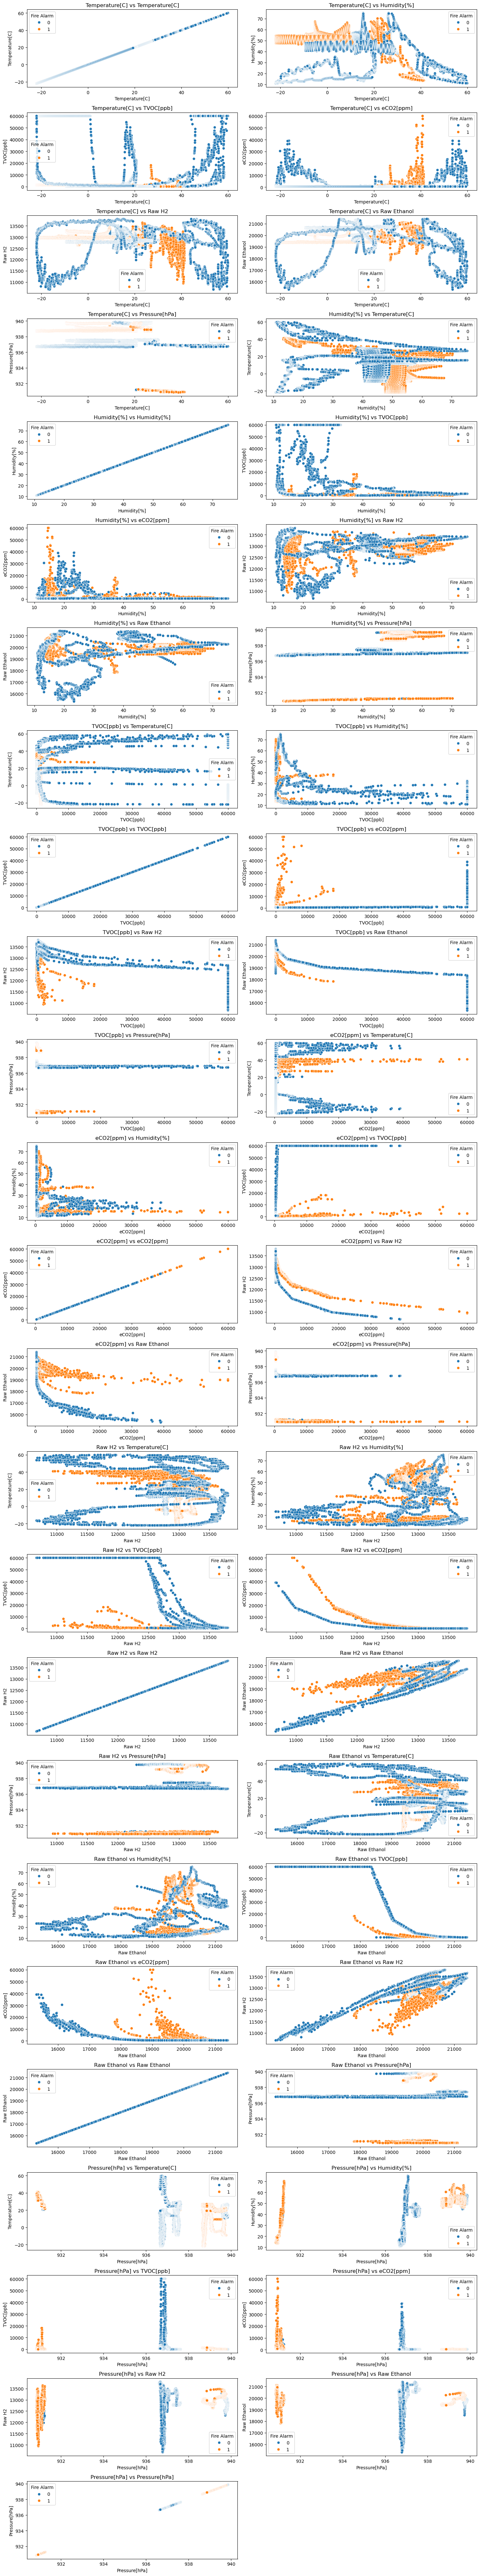

In [16]:
selected_vars = ['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol',	'Pressure[hPa]']


plt.figure(figsize=(15,80))

v = 1  # Counter for subplot index

for i in selected_vars:
    for j in selected_vars:
        plt.subplot(25, 2, v)
        sns.scatterplot(x=i, y=j, data=data,hue='Fire Alarm')
        plt.title(f'{i} vs {j}')
        v += 1


plt.tight_layout()
plt.show()

In [17]:
temp_model = RandomForestClassifier(n_estimators=250,n_jobs=8)
temp_model.fit(data[data.columns.drop(['Fire Alarm','UTC'])].to_numpy(),data['Fire Alarm'].to_numpy())

RandomForestClassifier(n_estimators=250)

<Axes: ylabel='None'>

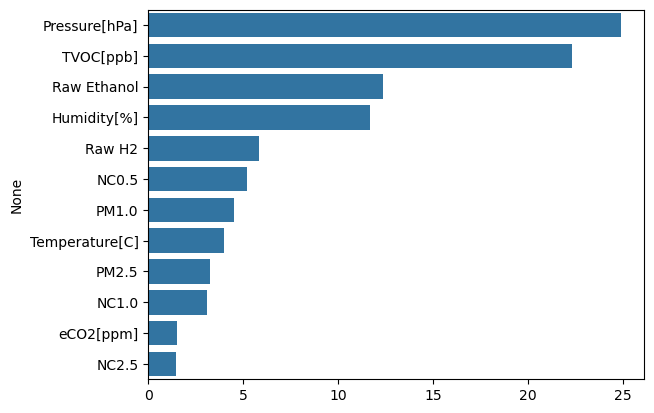

In [18]:
importance = temp_model.feature_importances_*100
order = np.argsort(importance)[::-1]
sns.barplot(x=np.sort(importance)[::-1],y=data.columns.drop(['Fire Alarm','UTC'])[order])

In [19]:
def train_model(models:list,test_x:np.ndarray,test_y:np.ndarray,train_x:np.ndarray,train_y:np.ndarray,eval:dict):
    keys = list(eval.keys())
    for i,j in enumerate(models):
        j.fit(train_x,train_y)
        pred = j.predict(test_x)
        eval[keys[i]]["precision"].append(precision_score(test_y,pred))
        eval[keys[i]]["accuracy"].append(accuracy_score(test_y,pred))
        eval[keys[i]]["recall"].append(recall_score(test_y,pred))
        eval[keys[i]]["f1"].append(f1_score(test_y,pred))



In [20]:
scalar = StandardScaler()
X = data[data.columns.drop(['Fire Alarm','UTC','NC2.5','NC1.0','PM2.5','PM1.0'])].to_numpy()
y = data['Fire Alarm'].to_numpy()
X = scalar.fit_transform(X)
skf = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)
index = skf.split(X,y)
eval = {"log":{"precision":[],"recall":[],"f1":[],"accuracy":[]},"random":{"precision":[],"recall":[],"f1":[],"accuracy":[]},
        "svm":{"precision":[],"recall":[],"f1":[],"accuracy":[]},"KNN":{"precision":[],"recall":[],"f1":[],"accuracy":[]},
        "ada":{"precision":[],"recall":[],"f1":[],"accuracy":[]}, "gradient":{"precision":[],"recall":[],"f1":[],"accuracy":[]}
        }
train_models = [LogisticRegression(max_iter=1000,n_jobs=8),RandomForestClassifier(n_jobs=8),SVC(),KNeighborsClassifier(n_jobs=8),AdaBoostClassifier(),GradientBoostingClassifier()]
for train,test in index:
    train_model(train_models,X[test],y[test],X[train],y[train],eval)


In [21]:
summary = {
    "model":[],
    "precision":[],
    "recall":[],
    "f1_score":[],
    "accuracy":[]
}
for i in eval.keys():
    summary["model"].append(i)
    summary["precision"].append(np.mean(eval[i]["precision"]))
    summary["recall"].append(np.mean(eval[i]["recall"]))
    summary["accuracy"].append(np.mean(eval[i]["accuracy"]))
    summary["f1_score"].append(np.mean(eval[i]["f1"]))
pd.DataFrame(summary).style.background_gradient(cmap="Blues")

In [22]:
params_grid = {
    'n_estimators':[100,150,200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features':['log2','sqrt']
}

In [23]:
model = RandomForestClassifier()
grid_search = GridSearchCV(model,param_grid=params_grid,cv=StratifiedKFold(n_splits=7) ,scoring=['recall', 'precision'],refit="recall",n_jobs=8)
grid_search.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 150, 200]},
             refit='recall', scoring=['recall', 'precision'])

In [24]:
new_skf = StratifiedKFold(n_splits=7,shuffle=True,random_state=42)
new_index = new_skf.split(X,y)
j = 1
for train,test in new_index:
    grid_search.best_estimator_.fit(X[train],y[train])
    print("Fold",j)
    print(classification_report(y[test],grid_search.best_estimator_.predict(X[test])))
    j += 1

Fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      6394

    accuracy                           1.00      8948
   macro avg       1.00      1.00      1.00      8948
weighted avg       1.00      1.00      1.00      8948

Fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2554
           1       1.00      1.00      1.00      6393

    accuracy                           1.00      8947
   macro avg       1.00      1.00      1.00      8947
weighted avg       1.00      1.00      1.00      8947

Fold 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2553
           1       1.00      1.00      1.00      6394

    accuracy                           1.00      8947
   macro avg       1.00      1.00      1.00      8947
weighted avg       1.00      1.00      1.00      8947

In [25]:
grid_search.best_estimator_.fit(X,y)

RandomForestClassifier(criterion='entropy', max_features='log2')

In [41]:
pickle.dump(grid_search.best_estimator_,open("../model.pkl","wb"))
pickle.dump(scalar,open("../scalar.pkl","wb"))

In [39]:
if __name__ == '__main__':
    model = Model(grid_search.best_estimator_,scalar)

In [43]:
scalar.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}